#iPython Magics
iPython does a lot of neat things. The `%` and `%%` symbols are used to indicate a line that is not a Python statement but a command for iPython to interpret. These commands are called **magics** and can change the behavior of iPython, interact with the operating system, change the display of items, etc.

One trick is to tell iPython to interpret cells using different interpreters besides Python. This lets you embed may kinds of code in an iPython notebook.

We're going to use this trick to install a Python module we'll need later as part of the astronomy workbook.

First, you need a separate cell.

#Python Review
Let's start with a warmup excercise to refresh what you learned in Python I.

Write a function that takes one argument, a dictionary. The dictionary can contain different types of objects. Use a for loop to look at the objects in the dictionary and if the object is a number, add that number to a running total. Return the total at the end of the function.

Call your function with a test dictionary that contains at least one string, one float, and one integer.

Here are some reminders about the syntax of Python:

1. Dictionaries are created with curly braces `{}`
1. Use `print` to look at variables
1. Functions definitions start with the key word `def`
1. Code blocks start with a colon `:` and continue as long as lines are indented
1. For loops iterate over collections like lists and dictionaries
1. If statements only execute when a condition is true
1. You can determine the type of a variable with the `isinstance()` function, types include `int` and `float`
1. Use `return` to return a value from a function



In [12]:
# Function to sum up numbers in a dictionary


#Data Science Tutorial
Now that we've covered some Python basics, we will begin a tutorial going through many tasks a data scientist may perform.  We will obtain real world data and go through the process of auditing, analyzing, visualing, and building classifiers from the data.

We will use a database of breast cancer data obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  The data is a collection of samples from Dr. Wolberg's clinical cases with attributes pertaining to tumors and a class labeling the sample as benign or malignant.

| Attribute                      | Domain                          |
|--------------------------------|---------------------------------|
| 1. Sample code number          | id number                       |
| 2. Clump Thickness             | 1 - 10                          |
| 3. Uniformity of Cell Size     | 1 - 10                          |
| 4. Uniformity of Cell Shape    | 1 - 10                          |
| 5. Marginal Adhesion           | 1 - 10                          |
| 6. Single Epithelial Cell Size | 1 - 10                          |
| 7. Bare Nuclei                 | 1 - 10                          |
| 8. Bland Chromatin             | 1 - 10                          |
| 9. Normal Nucleoli             | 1 - 10                          |
| 10. Mitoses                    | 1 - 10                          |
| 11. Class                      | (2 for benign, 4 for malignant) |

For more information on this data set:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

##Obtaining the Data
Lets begin by programmatically obtaining the data.  Here I'll define a function we can use to make HTTP requests and download the data

In [87]:
# def download file

Now we'll specify the url of the file and the file name we will save to

In [88]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
filename = 'breast-cancer-wisconsin.csv'

And make a call to <code>download_file</code>

In [89]:
# execute download file

Now this might seem like overkill for downloading a single, small csv file, but we can use this same function to access countless APIs available on the World Wide Web by building an API request in the url.

##Wrangling the Data
Now that we have some data, lets get it into a useful form.  For this task we will use a package called pandas. pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for Python.  The most fundamental data structure in pandas is the dataframe, which is similar to the data.frame data structure found in the R statistical programming language.

For more information: http://pandas.pydata.org

pandas dataframes are a 2-dimensional labeled data structures with columns of potentially different types.  Dataframes can be thought of as similar to a spreadsheet or SQL table.

There are numerous ways to build a dataframe with pandas.  Since we have already attained a csv file, we can use a parser built into pandas called <code>read_csv</code> which will read the contents of a csv file directly into a data frame.

For more information: http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html

In [4]:
# pandas, read

Whoops, looks like our csv file did not contain a header row.  <code>read_csv</code> assumes the first row of the csv is the header by default.

Lets check out the file located here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

This contains information about the data set including the names of the attributes.

Lets create a list of these attribute names to use when reading the csv file

In [91]:
# \ allows multi line wrapping
cancer_header = [ \
                 'sample_code_number', \
                 'clump_thickness', \
                 'uniformity_cell_size', \
                 'uniformity_cell_shape', \
                 'marginal_adhesion', \
                 'single_epithelial_cell_size', \
                 'bare_nuclei', \
                 'bland_chromatin', \
                 'normal_nucleoli', \
                 'mitoses', \
                 'class']

Lets try the import again, this time specifying the names.  When specifying names, the <code>read_csv</code> function requires us to set the <code>header</code> row number to <code>None</code>

In [3]:
# read csv

Lets take a look at some simple statistics for the **clump_thickness** column

In [2]:
# describe data

Referring to the documentation link above about the data, the count, range of values (min = 1, max = 10), and data type (dtype = float64) look correct.

Lets take a look at another column, this time **bare_nuclei**

In [1]:
# describe data

Well at least the count is correct.  We were expecting no more than 10 unique values and now the data type is an object.  

Whats up with our data?

We have arrived at arguably the most important part of performing data science: dealing with messy data.  One of most important tools in a data scientist's toolbox is the ability to audit, clean, and reshape data.  The real world is full of messy data and your sources may not always have data in the exact format you desire.

In this case we are working with csv data, which is a relatively straightforward format, but this will not always be the case when performing real world data science.  Data comes in all varieties from csv all the way to something as unstructured as a collection of emails or documents.  A data scientist must be versed in a wide variety of technologies and methodologies in order to be successful.

Now, lets do a little bit of digging into why were are not getting a numeric pandas column

In [5]:
# unique values

Using <code>unique</code> we can see that '?' is one of the distinct values that appears in this series.  Looking again at the documentation for this data set, we find the following:

>Missing attribute values: 16
>
>   There are 16 instances in Groups 1 to 6 that contain a single missing 
>   (i.e., unavailable) attribute value, now denoted by "?". 

It was so nice of them to tell us to expect these missing values, but as a data scientist that will almost never be the case.  Lets see what we can do with these missing values. 

In [96]:
# convert to numeric

Here we have attempted to convert the **bare_nuclei** series to a numeric type.  Lets see what the unique values are now.

In [97]:
cancer_data["bare_nuclei"].unique()

array([  1.,  10.,   2.,   4.,   3.,   9.,   7.,  nan,   5.,   8.,   6.])

The decimal point after each number means that it is an integer value being represented by a floating point number.  Now instead of our pesky '?' we have <code>nan</code> (not a number).  <code>nan</code> is a construct used by pandas to represent the absence of value.  It is a data type that comes from the package numpy, used internally by pandas, and is not part of the standard Python library.

Now that we have <code>nan</code> values in place of '?', we can use some nice features in pandas to deal with these missing values.

What we are about to do is what is called "imputing" or providing a replacement for missing values so the data set becomes easier to work with.  There are a number of strategies for imputing missing values, all with their own pitfalls.  In general, imputation introduces some degree of bias to the data, so the imputation strategy taken should be in an attempt to minimize that bias.

Here, we will simply use the mean of all of the non-nan values in the series as a replacement.  Since we already know that the data is integer in possible values, we will round the mean to the nearest whole number.

In [98]:
# fillna

array([  1.,  10.,   2.,   4.,   3.,   9.,   7.,   5.,   8.,   6.])

<code>fillna</code> is a dataframe function that replaces all nan values with either a scalar value, a series of values with the same indices as found in the dataframe, or a dataframe that is indexed by the columns of the target dataframe.

<code>cancer_data.mean().round()</code> will take the mean of each column (this computation ignores the currently present nan values), then round, and return a dataframe indexed by the columns of the original dataframe:

In [99]:
cancer_data.mean().round()

sample_code_number             1071704
clump_thickness                      4
uniformity_cell_size                 3
uniformity_cell_shape                3
marginal_adhesion                    3
single_epithelial_cell_size          3
bare_nuclei                          4
bland_chromatin                      3
normal_nucleoli                      3
mitoses                              2
class                                3
dtype: float64

<code>inplace=True</code> allows us to make this modification directly on the dataframe, without having to do any assignment.  

Now that we have figured out how to impute these missing values in a single column, lets start over and quickly apply this technique to the entire dataframe.

In [100]:
cancer_data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, names=cancer_header)
cancer_data = cancer_data.convert_objects(convert_numeric=True)
cancer_data.fillna(cancer_data.mean().round(), inplace=True)
cancer_data["bare_nuclei"].describe()

count    699.000000
mean       3.555079
std        3.602496
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
dtype: float64

In [101]:
cancer_data["bare_nuclei"].unique()

array([  1.,  10.,   2.,   4.,   3.,   9.,   7.,   5.,   8.,   6.])

Structurally, Pandas dataframes are a collection of Series objects sharing a common index.  In general, the Series object and Dataframe object share a large number of functions with some behavioral differences.  In other words, whatever computation you can do on a single column can generally be applied to the entire dataframe.

Now we can use the dataframe version of <code>describe</code> to get an overview of all of our data

In [6]:
# describe

##Visualizing the Data
Another important tool in the data scientist's toolbox is the ability to create visualizations from data.  Visualizing data is often the most logical place to start getting a deeper intuition of the data.  This intuition will shape and drive your analysis.

Even more important than visualizing data for your own personal benefit, it is often the job of the data scientist to use the data to tell a story.  Creating illustrative visuals that succinctly convey an idea are the best way to tell that story, especially to stakeholders with less technical skillsets.

Here we will be using a Python package called ggplot (https://ggplot.yhathq.com).  The ggplot package is an attempt to bring visuals following the guidelines outlayed in the grammar of graphics (http://vita.had.co.nz/papers/layered-grammar.html) to Python.  It is based off of and intended to mimic the features of the ggplot2 library found in R.  Additionally, ggplot is designed to work with Pandas dataframes, making things nice and simple. 

We'll start by doing a bit of setup

In [103]:
# The following line is NOT Python code, but a special syntax for enabling inline plotting in IPython
%matplotlib inline 

from ggplot import *

import warnings

# ggplot usage of pandas throws a future warning
warnings.filterwarnings('ignore')

So we enabled plotting in IPython and imported everything from the ggplot package.  Now we'll create a plot and then break down the components

In [12]:
# ggplot cancer_data

A plot begins with the <code>ggplot</code> function.  Here, we pass in the cancer_data pandas dataframe and a special function called <code>aes</code> (short for aesthetic).  The values provided to <code>aes</code> change depending on which type of plot is being used.  Here we are going to make a histogram from the **clump_thickness** column in cancer_data, so that column name needs to be passed as the x parameter to <code>aes</code>.

The grammar of graphics is based off of a concept of "geoms" (short for geometric objects).  These geoms provide granular control of the plot and are progressively added to the base call to <code>ggplot</code> with + syntax.


Lets say we wanted to show the mean clump_thickness on this plot.  We could do something like the following

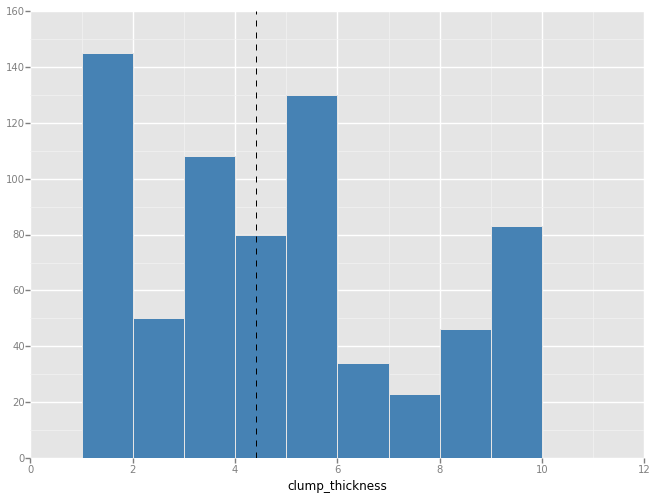

<ggplot: (284385069)>


In [105]:
plt = ggplot(aes(x = 'clump_thickness'), data = cancer_data) + \
        geom_histogram(binwidth = 1, fill = 'steelblue') + \
        geom_vline(xintercept = [cancer_data['clump_thickness'].mean()], linetype='dashed')
print plt

As you can see, each geom has its own set of parameters specific to the appearance of that geom (also called aesthetics).

Lets try a scatter plot to get some multi-variable action

In [9]:
# scatter plot

Sometimes when working with integer data, or data that takes on a limited range of values, it is easier to visualize the plot with added jitter to the points.  We can do that by adding an aesthetic to <code>geom_point</code>.

In [8]:
# scatter with jitter

With a simple aesthetic addition, we can see how these two variables play into our cancer classification

In [7]:
# colored scatter

By adding <code>color = 'class'</code> as a parameter to the aes function, we now give a color to each unique value found in that column and automatically get a legend.  Remember, 2 is benign and 4 is malignant. 

We can also do things such as add a title or change the axis labeling with geoms

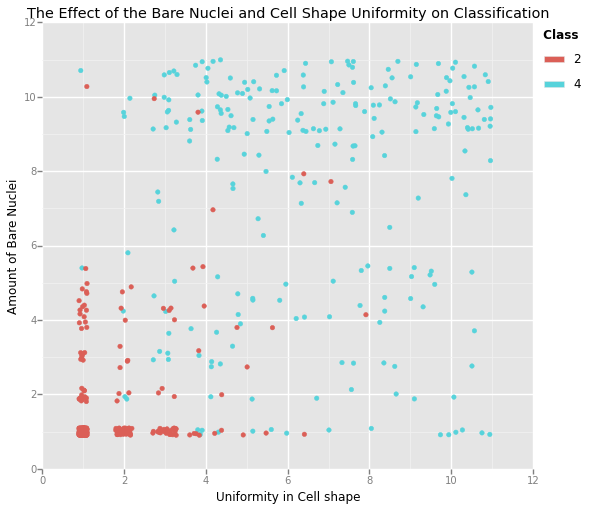

<ggplot: (284331857)>


In [109]:
plt = ggplot(aes(x = 'uniformity_cell_shape', y = 'bare_nuclei', color = 'class'), data = cancer_data) + \
        geom_point(position = 'jitter') + \
        ggtitle("The Effect of the Bare Nuclei and Cell Shape Uniformity on Classification") + \
        ylab("Amount of Bare Nuclei") + \
        xlab("Uniformity in Cell shape")
print plt

There is definitely some patterning going on in that plot.

A slightly different way to convey this idea is to use faceting.  Faceting is the creation of multiple related plots arranged by the values of a given faceted variable

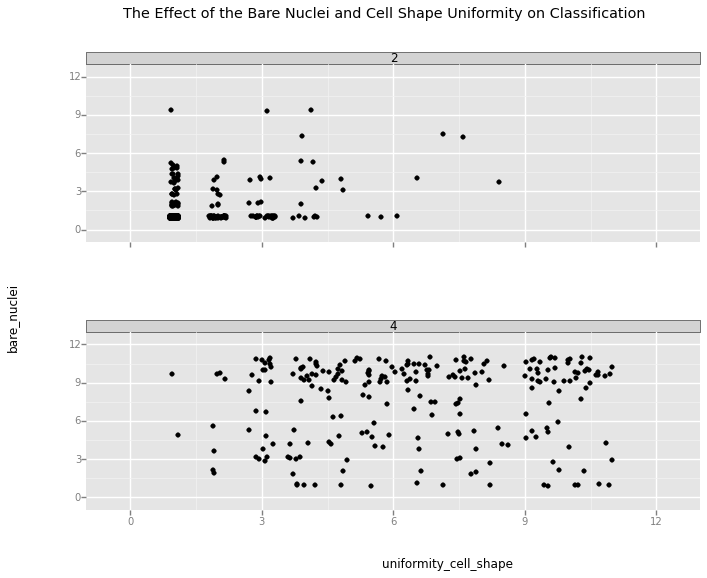

<ggplot: (284331841)>


In [110]:
plt = ggplot(aes(x = 'uniformity_cell_shape', y = 'bare_nuclei'), data = cancer_data) + \
        geom_point(position = 'jitter') + \
        ggtitle("The Effect of the Bare Nuclei and Cell Shape Uniformity on Classification") + \
        facet_grid('class')
print plt

Rather than set the color equal to the class, we have created two plots based off of the class.  With a facet, we can get very detailed.  Lets through some more variables into the mix

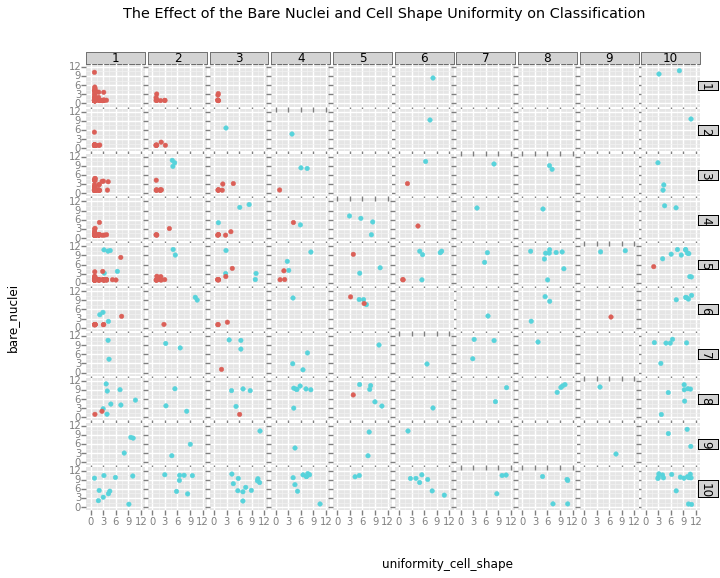

<ggplot: (284282745)>


In [111]:
plt = ggplot(aes(x = 'uniformity_cell_shape', y = 'bare_nuclei', color = 'class'), data = cancer_data) + \
        geom_point(position = 'jitter') + \
        ggtitle("The Effect of the Bare Nuclei and Cell Shape Uniformity on Classification") + \
        facet_grid('clump_thickness', 'marginal_adhesion')
print plt

Unfortunately, legends for faceting are not yet implemented in the Python ggplot package.  In this example we faceted on the x-axis with **clump_thickness** and along the y-axis with **marginal_adhesion**, then created 100 plots of **uniformity_cell_shape** vs. **bare_nuclei** effect on **class**.

I highly encourage you to check out https://ggplot.yhathq.com/docs/index.html to see all of the available geoms.  The best way to learn is to play with and visualize the data with many different plots and aesthetics.

##Machine Learning
So now that we've acquired, audited, cleaned, and visualized our data, we have arrived at machine learning.  By formal definition from Tom Mitchell:

>A computer program is set to learn from an experience E with 
>respect to some task T and some performance measure P if its performance 
>on T as measured by P improves with experience E.

Okay, thats a bit ridiculous.  Essentially machine learning is the science of building algorithms that learn from data in order make predictions about the data.  There are two main classes of machine learning: supervised and unsupervised.

In supervised learning, an algorithm will use the features of the data given to make a prediction about a known label.  For example, we will use supervised learning here to take features such as bare_nuclei and uniformity_cell_shape and predict a tumor class (benign or malignant).  This type of machine learning is called supervised because the class labels (benign or malignant) are a known quantity during learning, so we are *supervising* the algorithm with the "correct" answer.

In unsupervised learning, an algorithm will use the features of the data to discover what types of labels there could be.  The "correct" answer is not known.

In this session we will be mostly focused on supervised learning as we attempt to predict whether a tumor is benign or malignant.  We will also be focused on doing some practical machine learning, and will glaze over the algorithmic details.

The first thing we have to do is to extract the class labels and features from <code>cancer_data</code> and store them as separate arrays.  In our first classifier we will only choose two features from <code>cancer_data</code> to keep things simple

In [ ]:
# cancer features

Here we call <code>values</code> on the dataframe to extract the values stored in the dataframe as an array of numpy arrays with the same dimensions as our subsetted dataframe.  Numpy is a powerful, high performance scientific computing package that implements arrays.  It is used internally by pandas.  We will use <code>labels</code> and <code>features</code> later on in our machine learning classifier

In [118]:
# labels and features

An important concept in machine learning is to split the data set into training data and testing data.  The machine learning algorithm will use the subset of training data to build a classifier to predict labels.  We then test the accuracy of this classifier on the subset of testing data.  This is done in order to prevent overfitting the classifier to one given set of data.

Overfitting is a major concern in the design of machine learning algorithms.  Conceptually, overfitting is when a classifier is really good at predicting the data used to build it, but isn't robust or general enough to predict new, yet unseen data all that well.

To perform machine learning, we will use a package called sci-kit learn (sklearn for short).  The sklearn cross_validation module contains a function called <code>train_test_split</code> that will take in features and labels, and randomly select values into the training and testing subsets

In [113]:
from sklearn.cross_validation import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.3, 
                                                                            random_state = 42)

For this example, we will build a Decision Tree Classifier.  The goal of a decision tree is to create a prediction by outlining a simple tree of decision rules.  These rules are built from the training data by slicing the data on simple boundaries and trying to minimize the prediction error of that boundary.  More details on decision trees can be found here: http://scikit-learn.org/stable/modules/tree.html

The first step is to import the classifier from the <code>sklearn.tree</code> module.

In [ ]:
# import decision trees

Next, we create a variable to store the classifier

In [ ]:
# create decision tree

Then we have to fit the classifier to the training data. Both the training features (uniformity_cell_shape and bare_nuclei) and the labels (benign vs. malignant) are passed to the fit function

In [ ]:
#fit classifier

The classifier is now ready to make some predictions.  We can use the score function to see how accurate the classifier is on the test data.  The score function will take the data in <code>features_test</code>, make a prediction of benign or malignant based on the decision tree that was fit to the training data, and compare that prediction to the true values in <code>labels_test</code>

In [10]:
# test accuracy

Nearly all classifiers, decision trees included, will have paremeters that can be tuned to build a more accurate model.  Without any parameter tuning and using just two features we have made a pretty accurate prediction.  Good job!

To get a better idea of what is going on, I have included a helper function to plot our test data along with the decision boundary

In [11]:
# plot decisions

The area in red is where the classifier predicts a malignant tumor, whereas the blue area predicts a benign tumor.  The color of the points on the plot represents the true label of the data point.  Remember, there is no jitter included in this plot, so a number of data points are plotted on top of one another.

The vertical and horizontal lines represent what is called the decision boundary.  For example, our classifier predicts all data points with uniformity_cell_shape greater than around 6.25 to be malignant.